# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 4: CNN 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
# Uncomment the line below to help debug if the path to included images don't show
#print(working_dir)
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below.
- Please restart the kernel and run the entire notebook again before you submit. (Exception - you may skip the cells where you train neural networks, running the cells which load previously saved weights instead. However, **don't delete/overwrite the output that model.fit produced during training!**)

**Names of person you have worked with goes here:**
<br><BR>

<hr style="height:2pt">

In [3]:
import numpy as np

from PIL import Image

from matplotlib import pyplot
import matplotlib.pylab as plt 
from scipy.signal import convolve2d
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

<div class="theme"> Overview </div> 


In this homework, we will explore Convolutional Neural Networks (CNNs).  We'll explore the mechanics of convolutional operations and how filters can extract certain features of images, increasing in abstraction with depth. Then we will build a CNN to classify CIFAR-10 images, a standard pedagogical problem, and use saliency maps to understand what the network is paying attention to. Finally, we will see that CNNs aren't just for classifying. They can serve as image input processing for a variety of tasks, as we will show by training a network to rotate faces upright.

<div class='exercise'> <b> Question 1: Convolutional Neural Network Mechanics [10pts total] </b></div>


As you know from lecture, in convolutional neural networks, a convolution is a multiplicative operation on a local region of values. Convolutional layers have shown themselves to have been very useful in image classification, as they allows the network to retain local spatial information for feature extraction.


**1.1** Calculate Convolutions. [5pts]




For the following 2D matrix:

$$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$$

you will use the following 2x2 filter to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 3 
\end{array} \right)
$$

Compute this operation by hand assuming a vertical and horizontal stride of 1 as well as a) valid, b) same, and c) full padding modes. 

**1.2** Understanding Pooling Operations. [5pts]

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used: AveragePooling and MaxPooling.

Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2. Repeat with a stride of 1x1.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

## Answers

**1.1** Calculate Convolutions. [5pts]




For the following 2D matrix:

$$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$$

you will use the following 2x2 filter to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 3
\end{array} \right)
$$

Compute this operation by hand assuming a vertical and horizontal stride of 1 as well as a) valid, b) same, and c) full padding modes.

A) Valid

$$
\left( \begin{array}{cccc}
13 & 15 & 16  \\
14 & 5 & 9  \\
22 & 7 & 11 
\end{array} \right)
$$
    
B) Same padding (top & left)

$$
\left( \begin{array}{cccc}
6 & 11 & 9 & 14 \\
11 & 13 & 15 & 16 \\
15 & 14 & 5 & 9 \\
25 & 22 & 7 & 11
\end{array} \right)
$$

C) full padding

$$
\left( \begin{array}{cccc}
6 & 11 & 9 & 14 & 4 \\
11 & 13 & 15 & 16 & 6 \\
15 & 14 & 5 & 9 & 5 \\
25 & 22 & 7 & 11 & 5 \\
7 & 16 & 5 & 5 & 6
\end{array} \right)
$$

**1.2** Understanding Pooling Operations. [5pts]

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used: AveragePooling and MaxPooling.

Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2. Repeat with a stride of 1x1.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

**You may answer question 1.2 in this markdown cell by replacing the '?' marks with the correct value.**

**A) size 2x2 and stride 2x2**

MaxPooling:
$$
\left( \begin{array}{cccc}
 3 &  4 \\
5 & 2 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
1.75 & 2.25 \\
3 & 1.25
\end{array} \right)
$$

**B) size 2x2 and stride 1x1**

MaxPooling:
$$
\left( \begin{array}{cccc}
3 & 2 & 4 \\
4 & 2 & 2 \\
5 & 2 & 2 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
1.75 & 1.75 & 2.25 \\
2.25 & 1 & 1.25 \\
3 & 1.25 & 1.25
\end{array} \right)
$$

<div class='exercise'> <b> Question 2: CNNs at Work [30pts total]  </b></div>

Consider the following image of Widener Library:

![Widener Library](data/Widener_Library.jpg)

**2.1** [2pts] Load the image as a 2D Numpy array into the variable `library_image_data`. Normalize the image data so that values within `library_image_data` fall within [0., 1.]. The image is located at 'data/Widener_Library.jpg'.

**2.2** Filters for image processing. [5pts] Peform sharpening and normalized box blurring using 3x3 convolution kernels (see https://en.wikipedia.org/wiki/Kernel_(image_processing) for example), and apply each of these kernels to the image (separately on each color channel) with same padding mode (you may want to implement your own convolution function or try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)). Show the resulting 3-channel color images, using `np.clip()` to clip values to the range [0., 1.] for use with `imshow`.

**2.3** What a CNN sees. [5pts] Normalize `library_image_data` to the range [-0.5, 0.5], saving the resulting array to `norm_img`. Consider the following 3x3x3 kernel $A_{ijk}$ where
$$
A_{:,:,1} = A_{:,:,2} = A_{:,:,3} = \frac{1}{3} \left( \begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{array} \right),
$$
i.e. it has the same 3x3 depth slice throughout its depth (3 channels for the RGB channels of the input image). Apply $A_{ijk}$ to `norm_img` like a CNN would, using same padding mode (hint: what should the resulting shape of the feature map be?).

After the convolution part, CNNs next need an activation function. We now *rectify* the feature map by applying the ReLU activation function:

`
if x < 0:
    x = 0
else:
    x = x
`

or equivalently, $\textrm{ReLU}(x) = \textrm{max}(0,x)$ as it is often written. You can use `np.clip(x, a_min=0., a_max=None)` as a rectifier. Plot the rectified feature map using `imshow`, using the option `cmap='gray'` to produce a nice black & white image. What is this kernel doing?


**2.4** [5pts] Look up or come up with a 3x3x3 kernel for performing vertical edge detection, and another for performing horizontal edge detection. Apply the vertical edge kernel to `norm_img`, and then through a ReLU, saving the result as `vedges`. Apply the horizontal edge kernel to `norm_img`, pass it through a ReLU and save the result as `hedges`. Plot `vedges` and `hedges` with `imshow` in black & white. Don't worry too much about what kernels you end up using, or what overall normalization factor you use. As long as in the plot vertical(horizontal) edges are clearly emphasized while horizontal(vertical) edges are suppressed, you've done it correctly.

Together, `vedges` and `hedges` could be the output of the first layer of a CNN. Now we will investigate what can happen when we stack CNNs.

**2.5** [8pts] Concatenate `vedges` and `hedges` in a third dimension, calling the output `feature_map`. `feature_map` should have dimensions (267, 400, 2). Take the following 3x3x2 kernel $B_{ijk}$:

$$
B_{:,:,1} = B_{:,:,2} =  \left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array} \right),
$$
and apply it to `feature_map`. This time, before we pass it through the activation, we will add a bias. For now, start with a bias of `bias = -2`, and pass the the result through a ReLU, saving the output in variable `outmap`. Plot `outmap` in black & white. Depending on the normalization of your vertical/horizontal kernels, you will have to play with the `bias` until most of the image is black, except for some shapes that should pop out (you'll still have dots of white in other places). Now that the image has passed through 2 CNN layers, what feature(s) does this latest layer seem to be picking out? (Open-ended question, but there are wrong answers. Think about what $B_{ijk}$ is doing, in combination with the bias and rectifier)

**2.6** [5pts] Take a moment to think about the results of question 2.5. What seems to be the purpose of adding more CNN layers to increase the depth of a network? Why might it be useful to have multiple kernels/filters in a layer? Answer in 3-4 sentences.


## Answers

**2.1** [2pts] Load the image as a 2D Numpy array into the variable `library_image_data`. Normalize the image data so that values within `library_image_data` fall within [0., 1.]. The image is located at 'data/Widener_Library.jpg'.


In [4]:
# Load image as array
img = Image.open('data/Widener_Library.jpg')
library_image_data_r = np.asarray(img, dtype='uint8')

# Examine some of our existing values
print(library_image_data_r[:][0][:3])

# # Scale data and reexamine
library_image_data = (library_image_data_r - np.amin(library_image_data_r)) / (np.amax(library_image_data_r) - np.amin(library_image_data_r))
print(library_image_data[:][0][:3])

[[73 82 87]
 [75 82 88]
 [20 25 31]]
[[0.28627451 0.32156863 0.34117647]
 [0.29411765 0.32156863 0.34509804]
 [0.07843137 0.09803922 0.12156863]]


**2.2** Filters for image processing. [5pts] Peform sharpening and normalized box blurring using 3x3 convolution kernels (see https://en.wikipedia.org/wiki/Kernel_(image_processing) for example), and apply each of these kernels to the image (separately on each color channel) with same padding mode (you may want to implement your own convolution function or try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)). Show the resulting 3-channel color images, using `np.clip()` to clip values to the range [0., 1.] for use with `imshow`.


In [5]:
# Initialize convolution kernels
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
box_blur = np.ones((3,3))/9

# Convolve each channel with same padding mode
sharp_1 = convolve2d(library_image_data[:,:,0], sharpen, mode='same')
sharp_2 = convolve2d(library_image_data[:,:,1], sharpen, mode='same')
sharp_3 = convolve2d(library_image_data[:,:,2], sharpen, mode='same')
blur_1 = convolve2d(library_image_data[:,:,0], box_blur, mode='same')
blur_2 = convolve2d(library_image_data[:,:,1], box_blur, mode='same')
blur_3 = convolve2d(library_image_data[:,:,2], box_blur, mode='same')

# Stack the channels back to reform image matrix; we clip to (0,1) as well
sharpened_lib = (np.dstack((np.dstack((sharp_1, sharp_2)), sharp_3)))
blurred_lib = (np.dstack((np.dstack((blur_1, blur_2)), blur_3)))

sharpened_lib = np.clip(sharpened_lib, 0, 1)
blurred_lib = np.clip(blurred_lib, 0, 1)

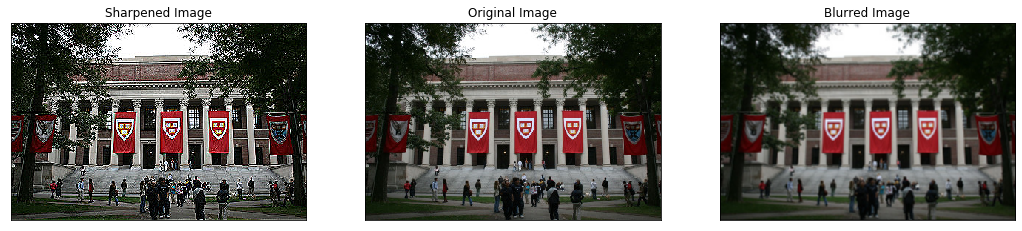

In [6]:
# Display the images
fig, ax = pyplot.subplots(1,3, figsize=(18, 6), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(sharpened_lib)
ax[0].set_title("Sharpened Image")
ax[1].imshow(library_image_data)
ax[1].set_title("Original Image")
ax[2].imshow(blurred_lib)
ax[2].set_title("Blurred Image")
pyplot.show()

**2.3** What a CNN sees. [5pts] Normalize `library_image_data` to the range [-0.5, 0.5], saving the resulting array to `norm_img`. Consider the following 3x3x3 kernel $A_{ijk}$ where
$$
A_{:,:,1} = A_{:,:,2} = A_{:,:,3} = \frac{1}{3} \left( \begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{array} \right),
$$
i.e. it has the same 3x3 depth slice throughout its depth (3 channels for the RGB channels of the input image). Apply $A_{ijk}$ to `norm_img` like a CNN would, using same padding mode (hint: what should the resulting shape of the feature map be?).

After the convolution part, CNNs next need an activation function. We now *rectify* the feature map by applying the ReLU activation function:

`
if x < 0:
x = 0
else:
x = x
`

or equivalently, $\textrm{ReLU}(x) = \textrm{max}(0,x)$ as it is often written. You can use `np.clip(x, a_min=0., a_max=None)` as a rectifier. Plot the rectified feature map using `imshow`, using the option `cmap='gray'` to produce a nice black & white image. What is this kernel doing?



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


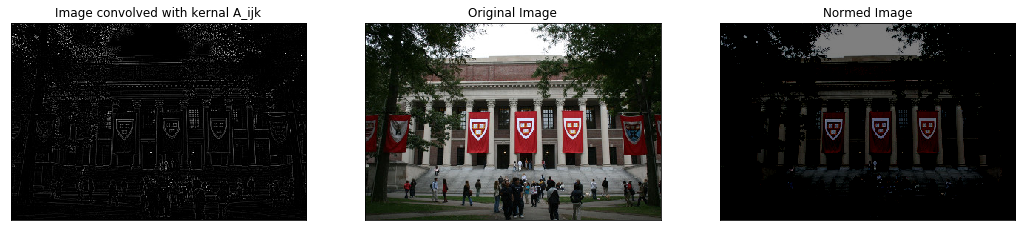

In [7]:
# We shift the range of our normalized data by 0.5 since ordinality is preserved
norm_img = library_image_data - 0.5

# Store edge-detection kernel
kernel_A = (np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]))/3

# Since A_ijk is the same across k, we apply the same kernel to convolve each channel with same padding
A_1 = convolve2d(norm_img[:,:,0], kernel_A, mode='same')
A_2 = convolve2d(norm_img[:,:,1], kernel_A, mode='same')
A_3 = convolve2d(norm_img[:,:,2], kernel_A, mode='same')

# Stack the images; then sum them up and clip as per ReLU activation from above
A_image = (np.dstack((np.dstack((A_1, A_2)), A_3)))
A_image = np.clip(np.sum(A_image, axis=2), a_min=0, a_max=None)

# Display the images
fig, ax = pyplot.subplots(1,3, figsize=(18, 6), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(A_image, cmap='gray')
ax[0].set_title("Image convolved with kernal A_ijk")
ax[1].imshow(library_image_data)
ax[1].set_title("Original Image")
ax[2].imshow(norm_img)
ax[2].set_title("Normed Image")
pyplot.show()

It seems like, from our normed image plot, the normalization to the range $(-0.5, 0.5)$ has darkened our image significantly. After passing our normed image data through the convolution, the image is we obtain is a (mostly black) grayscale image with what appears to be the outlines of the key features of our original image. Here, it seems like our kernel has pretty much extract the outlines or the edges from each color channel and we've aggregated them together (and clipped the values) in order to generate a greyscale image that depicts the edges via a single color channel.

The normalization appears to have darkened our image. The kernel seems to be detecting the edges of our normed image, but more than that, given that the kernel is $3 \times 3 \times 3$ but that it is constant across $k$, the kernel seems to be detecting edges across all three channels equally. By aggregating the outputs and clipping them, it seems like what we're doing here is detecting edges across all three channels and then deciding which edges (after considering their values in the three channels in aggregate) are the most significant via our activation function.

**2.4** [5pts] Look up or come up with a 3x3x3 kernel for performing vertical edge detection, and another for performing horizontal edge detection. Apply the vertical edge kernel to `norm_img`, and then through a ReLU, saving the result as `vedges`. Apply the horizontal edge kernel to `norm_img`, pass it through a ReLU and save the result as `hedges`. Plot `vedges` and `hedges` with `imshow` in black & white. Don't worry too much about what kernels you end up using, or what overall normalization factor you use. As long as in the plot vertical(horizontal) edges are clearly emphasized while horizontal(vertical) edges are suppressed, you've done it correctly.

Together, `vedges` and `hedges` could be the output of the first layer of a CNN. Now we will investigate what can happen when we stack CNNs.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


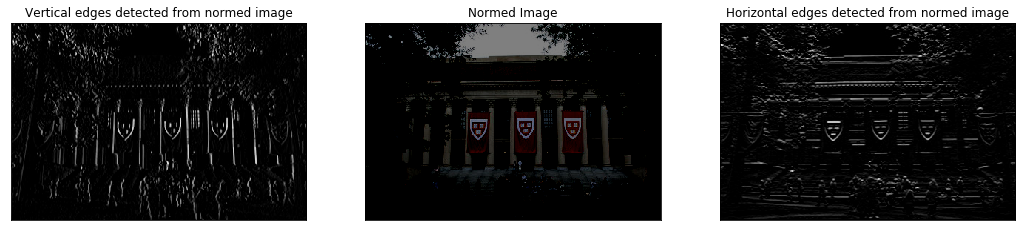

In [8]:
# Kernels based on Sobel edge operator: https://aishack.in/tutorials/image-convolution-examples/
vert_kernel = (np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))/3
hori_kernel = vert_kernel.T

# Since A_ijk is the same across k, we apply the same kernel to convolve each channel with same padding
v_1 = convolve2d(norm_img[:,:,0], vert_kernel, mode='same')
v_2 = convolve2d(norm_img[:,:,1], vert_kernel, mode='same')
v_3 = convolve2d(norm_img[:,:,2], vert_kernel, mode='same')
h_1 = convolve2d(norm_img[:,:,0], hori_kernel, mode='same')
h_2 = convolve2d(norm_img[:,:,1], hori_kernel, mode='same')
h_3 = convolve2d(norm_img[:,:,2], hori_kernel, mode='same')

# Stack the images; then sum them up and clip as per ReLU activation from above
vedges = (np.dstack((np.dstack((v_1, v_2)), v_3)))
vedges = np.clip(np.sum(vedges, axis=2), a_min=0, a_max=None)
hedges = (np.dstack((np.dstack((h_1, h_2)), h_3)))
hedges = np.clip(np.sum(hedges, axis=2), a_min=0, a_max=None)

# Display the images
fig, ax = pyplot.subplots(1,3, figsize=(18, 6), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(vedges, cmap='gray')
ax[0].set_title("Vertical edges detected from normed image")
ax[1].imshow(norm_img)
ax[1].set_title("Normed Image")
ax[2].imshow(hedges, cmap='gray')
ax[2].set_title("Horizontal edges detected from normed image")

pyplot.show()

**2.5** [8pts] Concatenate `vedges` and `hedges` in a third dimension, calling the output `feature_map`. `feature_map` should have dimensions (267, 400, 2). Take the following 3x3x2 kernel $B_{ijk}$:

$$
B_{:,:,1} = B_{:,:,2} =  \left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array} \right),
$$
and apply it to `feature_map`. This time, before we pass it through the activation, we will add a bias. For now, start with a bias of `bias = -2`, and pass the the result through a ReLU, saving the output in variable `outmap`. Plot `outmap` in black & white. Depending on the normalization of your vertical/horizontal kernels, you will have to play with the `bias` until most of the image is black, except for some shapes that should pop out (you'll still have dots of white in other places). Now that the image has passed through 2 CNN layers, what feature(s) does this latest layer seem to be picking out? (Open-ended question, but there are wrong answers. Think about what $B_{ijk}$ is doing, in combination with the bias and rectifier)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Check dimensions of feature map:  (267, 400, 2)


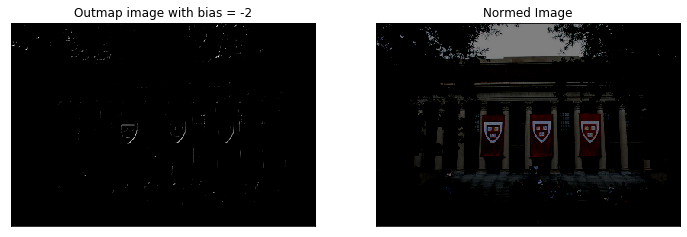

In [9]:
# Concatenate vedges and hedges
feature_map = np.dstack((vedges, hedges))
print("Check dimensions of feature map: ",feature_map.shape)

# Apply kernel B to feature map
kernel_B = np.array([[0,0,0], [0,1,0], [0,0,0]])
B_1 = convolve2d(feature_map[:,:,0], kernel_B, mode='same')
B_2 = convolve2d(feature_map[:,:,1], kernel_B, mode='same')

# Aggregate layers; add bias; pass through ReLU
bias = -2
feature_image = np.dstack((B_1, B_2))
outmap = np.clip((np.sum(feature_image, axis=2) + bias), a_min=0, a_max=None)

# Display the images
fig, ax = pyplot.subplots(1,2, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(outmap, cmap='gray')
ax[0].set_title("Outmap image with bias = -2")
ax[1].imshow(norm_img)
ax[1].set_title("Normed Image")
plt.show()

Just based on the above plot, it seems like the latest layer is picking out edges that are diagonal; I also observe several white dots but the overall picture is quite dark. I think what the bias is doing is that it is making it harder for edges that have been detected to pass through the activation function - so only the most significant (i.e. distinct edges which return the highest values) are observed. I check this by considering other biases below.

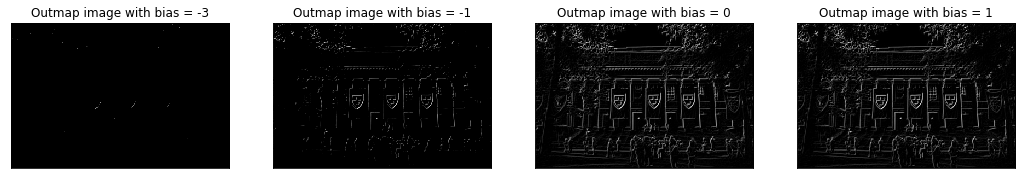

In [10]:
# We try different biases
bias = [-3, -1,0, 1]
outmap_1 = np.clip((np.sum(feature_image, axis=2) + bias[0]), a_min=0, a_max=None)
outmap_2 = np.clip((np.sum(feature_image, axis=2) + bias[1]), a_min=0, a_max=None)
outmap_3 = np.clip((np.sum(feature_image, axis=2) + bias[2]), a_min=0, a_max=None)
outmap_4 = np.clip((np.sum(feature_image, axis=2) + bias[3]), a_min=0, a_max=None)

# Display the images
fig, ax = pyplot.subplots(1,4, figsize=(18, 6), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(outmap_1, cmap='gray')
ax[0].set_title("Outmap image with bias = " + str(bias[0]))
ax[1].imshow(outmap_2, cmap='gray')
ax[1].set_title("Outmap image with bias = " + str(bias[1]))
ax[2].imshow(outmap_3, cmap='gray')
ax[2].set_title("Outmap image with bias = " + str(bias[2]))
ax[3].imshow(outmap_4, cmap='gray')
ax[3].set_title("Outmap image with bias = " + str(bias[3]))
pyplot.show()

Based on the above plots, my response is confirmed somewhat. The larger the negative bias, the fewer the edges we observe - presumably because the detected edges are having a harder time passing through the activation function. It seems, however, that when bias = 0, our kernel $B_{ijk}$ actually returns us both vertical, horizontal, and diagonal edges - however, it seems like the diagonal edges (i.e. those that contain some element of horizontal and vertical characteristics) are detected most strongly through this basis function (though this is mostly just intuitive speculation based on my observations).

**2.6** [5pts] Take a moment to think about the results of question 2.5. What seems to be the purpose of adding more CNN layers to increase the depth of a network? Why might it be useful to have multiple kernels/filters in a layer? Answer in 3-4 sentences.

From question 2.5, it seems like by combining the outputs of the horizontal edge detection and vertical edge detection filters, we were able to generate a filter that was able to pick out diagonal edges (which we used a bias to further identify). 

From this, we might infer that the purpose of adding more CNN layers, it seems, is that we can detect more characteristics, features, and elements of our images. This, then, implies that having a deeper CNN with multiple kernels/filters in a layer might be useful because it can enable our CNN to detect more complex image features and learn more from each image such that it can perform more complex image classification and interpretation. This is clearly useful because it has the potential to make our CNN more powerful at interpreting and classifying images.

<div class='exercise'> <b> Question 3: Building a Basic CNN Model [30pts total] </b></div>

In this question, you will use Keras to create a convolutional neural network for predicting the type of object shown in images from the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 sizes.


<span class='sub-q'> Loading CIFAR-10 and Constructing the Model. </span>

Load CIFAR-10 and use a combination of the following layers: Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order, and you can use as many layers as you'd like) to build your classification model. You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should construct the network yourself and not use a pre-written implementation. At least one of your Conv2D layers should have at least 9 filters to be able to do question 3.3.

Convolutional neural networks are very computationally intensive. We highly recommend that you train your model on a system using GPUs. On CPUs, this training can take over an hour. On GPUs, it can be done within minutes. If you become frustrated having to rerun your model every time you open your notebook, take a look at how to save your model weights as explicitly detailed in **question 4**, where it is required to save your weights.

You can approach the problems in this question by first creating a model assigning 32 filters to each Conv2D layer recreate the model with 64 filters/layer, 128, etc. For each generated model, keep track of the total number of parameters.

**3.1** [6pts] Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship.

**3.2** Choosing a Model, Training and Evaluating It. [7pts total]
 **[5pts]** Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes. **[2pts]** Plot the loss and accuracy (both train and test) for your chosen architecture.

**Techniques to Visualize the Model.**

We will gain an intuition into how our model is processing the inputs in two ways.  First we'll ask you to use feature maps to visualize the activations in the intermediate layers of the network. We've provided a helper function `get_feature_maps` to aid in extracting feature maps from layer outputs in your model network.  Feel free to take advantage of it if you'd like.  We'll also ask you to use [saliency maps](https://arxiv.org/abs/1312.6034) to visualize the pixels that have the largest impact on the classification of an input (image in this case), as well as a more recent development,[Grad-CAM](https://arxiv.org/abs/1610.02391), which has been shown to better indicate the attention of CNNs.

**3.3** [5pts] For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.

**3.4** [5pts] For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?

**3.5** [7pts] Repeat `3.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?

*A dictionary to turn class index into class labels for CIFAR-10*

In [11]:
cifar10dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

*Some imports for getting the CIFAR-10 dataset and for help with visualization*

In [12]:
import sys
!{sys.executable} -m pip install tf-keras-vis

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

## Answers

**3.1** [6pts] Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship.

In [13]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Examine data shape
print("Dimensions: ",x_train.shape)
print("Max-min: ",x_train.max(), x_train.min())

# Noremalize data between 0 and 1 for easier optimization
x_train = x_train.astype('float32') / x_train.max()
x_test = x_test.astype('float32') / x_test.max()

# Convert labels to categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Dimensions:  (50000, 32, 32, 3)
Max-min:  255 0


In [14]:
# Set up model
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3,3), activation='relu', 
                     input_shape=(32, 32, 3))) # Add Conv2D layer
cnn_model.add(MaxPooling2D((2,2))) # Add MaxPooling2D layer
cnn_model.add(Conv2D(64, (2,2), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(64, (2,2), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Flatten()) # Add flatten layer
cnn_model.add(Dropout(0.4)) # Add Dropout layer
cnn_model.add(Dense(32, activation='relu')) # Add Dense layer
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [15]:
# Alternative model to check number of parameters; one fewer Conv2D and MaxPool layer
alt_model = Sequential()
alt_model.add(Conv2D(32, (3,3), activation='relu', 
                     input_shape=(32, 32, 3))) # Add Conv2D layer
alt_model.add(MaxPooling2D((2,2))) # Add MaxPooling2D layer
alt_model.add(Conv2D(64, (2,2), activation='relu'))
alt_model.add(MaxPooling2D((2,2)))
alt_model.add(Flatten()) # Add flatten layer
alt_model.add(Dropout(0.4)) # Add Dropout layer
alt_model.add(Dense(32, activation='relu')) # Add Dense layer
alt_model.add(Dense(10, activation='softmax'))
alt_model.summary()

# Alternative model to check number of parameters; one fewer Conv2D and MaxPool layer
alt_alt_model = Sequential()
alt_alt_model.add(Conv2D(32, (3,3), activation='relu', 
                     input_shape=(32, 32, 3))) # Add Conv2D layer
alt_alt_model.add(MaxPooling2D((2,2))) # Add MaxPooling2D layer
alt_alt_model.add(Flatten()) # Add flatten layer
alt_alt_model.add(Dropout(0.4)) # Add Dropout layer
alt_alt_model.add(Dense(32, activation='relu')) # Add Dense layer
alt_alt_model.add(Dense(10, activation='softmax'))
alt_alt_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [16]:
# Alternative models with only reduced Conv2D layers
cnn_model_1 = Sequential()
cnn_model_1.add(Conv2D(32, (3,3), activation='relu', 
                     input_shape=(32, 32, 3))) # Add Conv2D layer
cnn_model_1.add(MaxPooling2D((2,2))) # Add MaxPooling2D layer
cnn_model_1.add(MaxPooling2D((2,2)))
cnn_model_1.add(Conv2D(64, (2,2), activation='relu'))
cnn_model_1.add(MaxPooling2D((2,2)))
cnn_model_1.add(Flatten()) # Add flatten layer
cnn_model_1.add(Dropout(0.4)) # Add Dropout layer
cnn_model_1.add(Dense(32, activation='relu')) # Add Dense layer
cnn_model_1.add(Dense(10, activation='softmax'))
cnn_model_1.summary()

cnn_model_2 = Sequential()
cnn_model_2.add(Conv2D(32, (3,3), activation='relu', 
                     input_shape=(32, 32, 3))) # Add Conv2D layer
cnn_model_2.add(MaxPooling2D((2,2))) # Add MaxPooling2D layer
cnn_model_2.add(MaxPooling2D((2,2)))
cnn_model_2.add(MaxPooling2D((2,2)))
cnn_model_2.add(Flatten()) # Add flatten layer
cnn_model_2.add(Dropout(0.4)) # Add Dropout layer
cnn_model_2.add(Dense(32, activation='relu')) # Add Dense layer
cnn_model_2.add(Dense(10, activation='softmax'))
cnn_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)          8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 576)              

In [17]:
# Alternative models with only reduced Maxpooling2D layers
cnn_model_3 = Sequential()
cnn_model_3.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
cnn_model_3.add(Conv2D(64, (2,2), activation='relu'))
cnn_model_3.add(MaxPooling2D((2,2)))
cnn_model_3.add(Conv2D(64, (2,2), activation='relu'))
cnn_model_3.add(MaxPooling2D((2,2)))
cnn_model_3.add(Flatten()) # Add flatten layer
cnn_model_3.add(Dropout(0.4)) # Add Dropout layer
cnn_model_3.add(Dense(32, activation='relu')) # Add Dense layer
cnn_model_3.add(Dense(10, activation='softmax'))
cnn_model_3.summary()
cnn_model_4 = Sequential()
cnn_model_4.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
cnn_model_4.add(Conv2D(64, (2,2), activation='relu'))
cnn_model_4.add(Conv2D(64, (2,2), activation='relu'))
cnn_model_4.add(MaxPooling2D((2,2)))
cnn_model_4.add(Flatten()) # Add flatten layer
cnn_model_4.add(Dropout(0.4)) # Add Dropout layer
cnn_model_4.add(Dense(32, activation='relu')) # Add Dense layer
cnn_model_4.add(Dense(10, activation='softmax'))
cnn_model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        16448     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2304)             

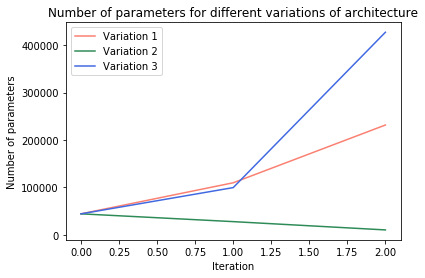

In [18]:
# Plot
variation_1 = [44394, 109866, 231658] # Drop Conv2D and MaxPool each time
variation_2 = [44394, 27946, 10474] # Drop Conv2D each time
variation_3 = [44394, 99690, 427270] # Drop MaxPool each time

plt.plot(np.arange(3), variation_1, label="Variation 1", c="Salmon")
plt.plot(np.arange(3), variation_2, label="Variation 2", c="Seagreen")
plt.plot(np.arange(3), variation_3, label="Variation 3", c="Royalblue")
plt.xlabel('Iteration')
plt.ylabel('Number of parameters')
plt.title('Number of parameters for different variations of architecture')
plt.legend()
plt.show()

Our initial model that is our reference point has 44,394 parameters.

Variation 1 involves dropping both a Conv2D and MaxPooling2D layer each time. Our first alternative model in variation 1 has  109,866 parameters; our second alternative model with two fewer Conv2D MaxPooling2D layers than our initial model has 231,658 parameters. 

Variation 2 involves dropping a Conv2D layer each time. Our first alternative model in variation 1 has  27946 parameters; our second alternative model with two fewer Conv2D layers than our initial model has 10474 parameters. 

Variation 3 involves dropping a MaxPooling2D layer each time. Our first alternative model in variation 1 has 99690 parameters; our second alternative model with two fewer MaxPooling2D layers than our initial model has 427270 parameters. 

The Conv2D and the MaxPooling2D layers have the following specifications respectively:
```alt_model.add(Conv2D(64, (2,2), activation='relu')) 
alt_model.add(MaxPooling2D((2,2)))
```.

Comparing variation 1 with our default, it seems like having more layers counter-intuitively results in a larger number of parameters. Removing a Conv2D and MaxPooling results in 2.4747 times the number of parameters; the subsequent removal of another layer results in 2.1085 times the number of parameters. The rate of change is quite similar so the change is probably either linear or occuring at a decreasing rate (kinda like a logarithmic curve).

Reason for this is that each convolutional layer and maxpooling layer reduces the number of data dimensions. Fewer layers mean that we obtain more parameters because our input (which is large) will experience less dimensionality reduction. This results in more parameters required in our CNN. 

Meanwhile if we consider variation 3, we see that dropping convolution layers while maintaining the same number of MaxPooling layers causes the number of parameters to fall almost linearly. This is because when we remove the convolution layers that lie in between MaxPooling layers, we essentially pool the results returned from each pooling layer which reduces the dimensionality of our data significantly and therefore reduces the number of parameters.

Finally, if we contrast variation 2 with variation 1 (in the former case, we only drop pooling layers), we see that the number of parameters seem to increase exponentially. This is due to the effect outlined earlier, where removing MaxPooling layers reduces the extent of dimensionality reduction and results in a larger number of parameters if our number of Convolution layers remains fix.

**3.2** Choosing a Model, Training and Evaluating It. [7pts total]
**[5pts]** Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes. **[2pts]** Plot the loss and accuracy (both train and test) for your chosen architecture.

In [19]:
# Model specifications
loss = tf.keras.losses.categorical_crossentropy
optimizer = Adam(lr=0.001)
metrics = ['accuracy'] 

# Compile model
cnn_model.compile(optimizer=optimizer, 
                  loss=loss,
                  metrics=metrics)

# Fit the model 
verbose, epochs, batch_size = 0, 30, 64 
history = cnn_model.fit(x_train, y_train, 
                              epochs=epochs, 
                              batch_size=batch_size, 
                              verbose=verbose,
                              validation_split=0.2,
                              shuffle=True)

In [20]:
# Report our final validation accuracy
print("Final validation accuracy: ",history.history['val_accuracy'][-1] * 100, "%")

Final validation accuracy:  74.07000064849854 %


We notice that the validation accuracy exceeds 70% as required in the question.


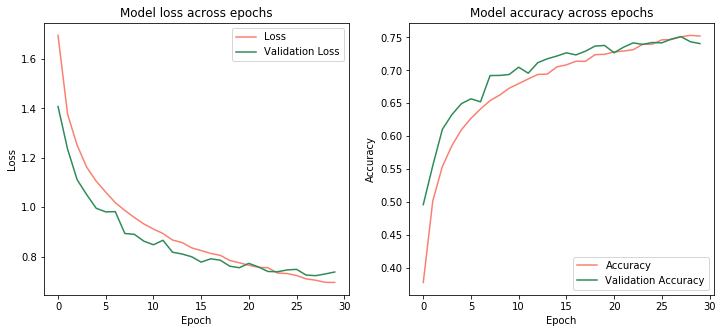

In [21]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))

# Plot loss
ax[0].plot(history.history['loss'], label='Loss', c="Salmon")
ax[0].plot(history.history['val_loss'], label='Validation Loss', c="Seagreen")
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss across epochs')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Accuracy', c="Salmon")
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy', c="Seagreen")
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Model accuracy across epochs')
ax[1].legend()
plt.show()

**3.3** [5pts] For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.


*Some code that will help you generate feature maps*

In [22]:
def get_feature_maps(model, layer_id, input_image):
    """Returns intermediate output (activation map) from passing an image to the model
    
    Parameters:
        model (tf.keras.Model): Model to examine
        layer_id (int): Which layer's (from zero) output to return
        input_image (ndarray): The input image
    Returns:
        maps (List[ndarray]): Feature map stack output by the specified layer
    """
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

Our CNN predicts that the input image is a horse


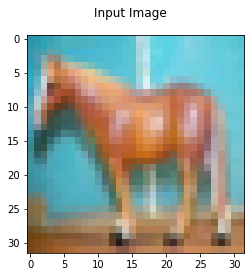

In [23]:
# Store our input image and its predicted class
input_image = x_test[137, :, :, :]
pred_class = cnn_model.predict_classes(input_image.reshape(1, 32,32,3))

# Check to see that our input image is correctly classified
plt.imshow(input_image)
plt.suptitle("Input Image")
print('Our CNN predicts that the input image is a', cifar10dict[pred_class[0]])

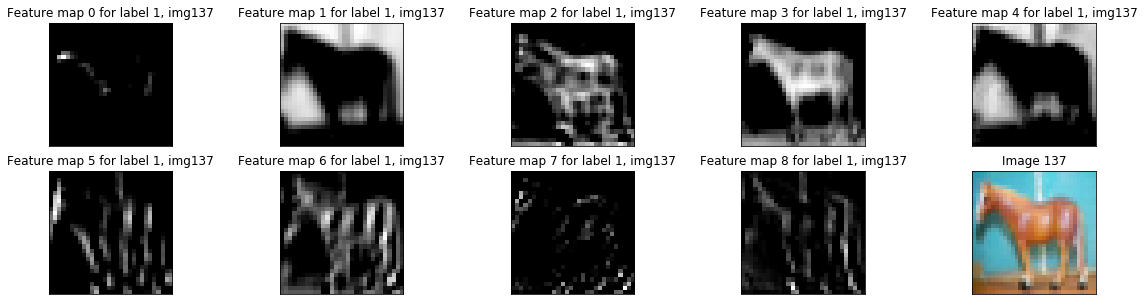

In [24]:
# Store layer id
l_id = 0

# Get original image for reference
fig, ax = plt.subplots(2,5, figsize=(20,5),subplot_kw={'xticks': [], 'yticks': []})
ax[1,4].imshow(input_image)
ax[1,4].set_title("Image 137")

# Examine the layers in our first label and plot them
for i in np.arange(9):
    if i < 5:
        ax[0,i].imshow(get_feature_maps(cnn_model, l_id, input_image)[i,:,], cmap='gray')
        ax[0,i].set_title("Feature map " + str(i) + " for label 1, img137")
    else:
        ax[1, i-5].imshow(get_feature_maps(cnn_model, l_id, input_image)[i,:,], cmap='gray')
        ax[1, i-5].set_title("Feature map " + str(i) + " for label 1, img137")

**3.4** [5pts] For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?


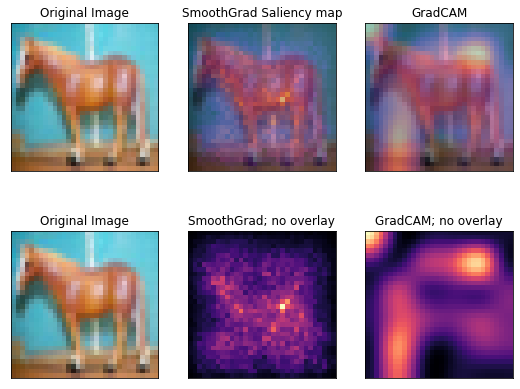

In [260]:
from tensorflow.keras import backend as K
# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

input_img = x_test[137, :, :, :]

# Generate saliency map
saliency = Saliency(cnn_model)
loss = lambda output: K.mean(output[:,pred_class[0]])

# tf.argmax(x_test[137])

saliency_map = saliency(loss, input_img, smooth_samples=20)
saliency_map = normalize(saliency_map)

# Generate heatmap with GradCAM
gradcam = Gradcam(cnn_model, model_modifier)
cam = gradcam(loss, input_img)
cam = normalize(cam)

# Plot saliency map, orignal and GradCAM
f, ax = plt.subplots(2, 3, figsize=(9, 7), subplot_kw={'xticks': [], 'yticks': []})
ax[0,0].imshow(input_img)
ax[0,0].set_title('Original Image')
ax[0,1].imshow(input_img)
ax[0,1].imshow(saliency_map[0], cmap='magma', alpha=0.5)
ax[0,1].set_title('SmoothGrad Saliency map')
ax[0,2].imshow(input_img)
ax[0,2].imshow(cam[0], cmap='magma', alpha=0.5)
ax[0,2].set_title('GradCAM')
ax[1,0].imshow(input_img) # Plot without overlay as well to better assess things
ax[1,0].set_title('Original Image')
ax[1,1].imshow(saliency_map[0], cmap='magma')
ax[1,1].set_title('SmoothGrad; no overlay')
ax[1,2].imshow(cam[0], cmap='magma')
ax[1,2].set_title('GradCAM; no overlay')
plt.show()

SmoothGrad tells us how much a small change to each pixel would affect the prediction; the SmoothGrad technique often significantly denoises this sensitivity mask by adding pixel-wise Gaussian noise to many copies of the image, and simply averages the resulting gradients. From the image it seems like the most significant pixels used by our model correspond to the underside of the horse and is able to recover this general 'horse shape' based on our saliency map - this is most obvious in our case without the overlay.

Meanwhile, GradCAM shows us what kind of an effect each ‘pixel’ or ‘number’ in the intermediate layers played towards assigning a specific class of an image. The heatmap illustrate which ‘pixels’ are more important (in terms of contribution to the final classification) and how important each are (based on the intensity on the heatmap). Here, the most important pixels (i.e. the hottest spots on our GradCAM heat map) are kinda like odd blobs around the horse. We also see this general area around the horse's body of relatively higher importance (a bit like an aura of sorts).

SmoothGrad seems easier to understand since it is able to recover the general horse shape; it seems to suggest that the most salient pixels that fed into our correct classification were the same pixels that contributed to the horse's overall appearance (in contrast to, say, the background). Meanwhile, it's hard to tell what's going on in the GradCAM heatmap - it seems like certain areas of high importance (high heat in the top left corner) don't make a lot of intuitive sense - perhaps the model found the point important, but the result is not as interpretable as the SmoothGrad map.

The network it definitely picks out the main subject of the image (the horse) and it seems to be focusing on pixels that are of similar colors and have some sort of clear outline or contrast with background pixels - though it's hard to tell just by looking at these two maps.

**3.5** [7pts] Repeat `3.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?

Our CNN predicts that the input image is a deer
Correct label should be: dog


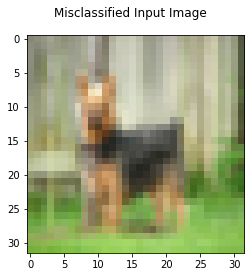

In [262]:
# Find an incorrectly classified image
# Store our input image and its predicted class
wrong_image = x_test[24, :, :, :]
wrong_pred_class = cnn_model.predict_classes(wrong_image.reshape(1, 32,32,3))

# Check to see that our input image is correctly classified
plt.imshow(wrong_image)
plt.suptitle("Misclassified Input Image")
print('Our CNN predicts that the input image is a', cifar10dict[wrong_pred_class[0]])
print('Correct label should be: dog')

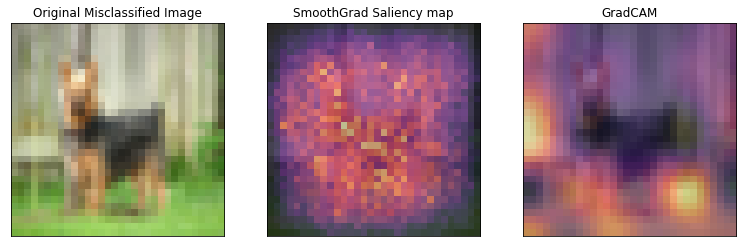

In [267]:
# Should have been a dog
# Generate saliency map
saliency = Saliency(cnn_model)
loss = lambda output: K.mean(output[:,wrong_pred_class[0]])
saliency_map = saliency(loss, wrong_image, smooth_samples=20)
saliency_map = normalize(saliency_map)

# Generate heatmap with GradCAM
gradcam = Gradcam(cnn_model, model_modifier)
cam = gradcam(loss, wrong_image)
cam = normalize(cam)

# Plot saliency map, orignal and GradCAM
f, ax = plt.subplots(1, 3, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(wrong_image)
ax[0].set_title('Original Misclassified Image')
ax[1].imshow(wrong_image)
ax[1].imshow(saliency_map[0], cmap='magma', alpha=0.7)
ax[1].set_title('SmoothGrad Saliency map')
ax[2].imshow(wrong_image)
ax[2].imshow(cam[0], cmap='magma', alpha=0.6)
ax[2].set_title('GradCAM')
plt.show()

From the above visualizations, we might hypothesize the network misclassified the dog because the dog's features resembled those of deers and because the background confused the network. We further hypothesize that a key part of this could be the low-resolution of the images.

This is because the SmoothGrad saliency map seems to show that the network was able to successfully pick out the dog's general shape - but this shape might as well be that of a deer because they seem pretty similar based on my visual inspection. Additionally, the SmoothGrad map indicates that the network also saw the background as being relatively salient; this might have meant that the background's similarity in color to parts of the dog might have confused our network as to where the outline of the dog might have been.

Meanwhile, GradCAM's heatmap is once again less intuitive - it picks up some key features of the dog but it also assigns high importance to random looking bits of background and the dog's hind legs. Meanwhile the dog's body is considered relatively unimportant - a contrast to our horse case where at least the general mass of the horse was deemed somewhat important on our heatmap. This could further imply that the background played an important role in the misclassification; our network might have confused the dog for being part of the background and that the background was more important somehow.

A reason for this could be because the images are low-resolution; as such, we might get less distinct outlines which can potentially lead the background to be confused from the subject of the images. We might image that if the resolution were even lower still, it'd be hard for us to even distinguish between horses and deer; hence, it could be that the low-resolution image combined with the general composition of the image contributed to this misclassification.

If this is really the underlying issue, I'd make sure that future images are of some decent level of resolution to avoid this type of network failure. 

<div class='exercise'> <b> Question 4: Image Orientation Estimation [30pts] </b></div>

In this problem we will construct a neural network to predict how far a face is from being "upright". Image orientation estimation with convolutional networks was first implemented in 2015 by Fischer, Dosovitskiy, and Brox in a paper titled ["Image Orientation Estimation with Convolutional Networks"](https://lmb.informatik.uni-freiburg.de/Publications/2015/FDB15/image_orientation.pdf), where the authors trained a network to straighten a wide variety of images using the Microsoft COCO dataset. In order to have a reasonable training time for a homework, we will be working on a subset of the problem where we just straighten images of faces. To do this, we will be using the [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset of celebrity faces, where we assume that professional photographers have taken level pictures. The training will be supervised, with a rotated image (up to $\pm 60^\circ$) as an input, and the amount (in degrees) that the image has been rotated as a target. 

The network training for this question can be long (even using a GPU on the JupyterHub, it can take 1-2 hours to reach peak network performance), but deep learning generally requires substantial training times on the order of days or weeks. One aim of this problem is to give you a gentle introduction to some techniques for prototyping such networks before a full training.

<span class='sub-q'>  Loading CelebA and Rotating Images. [5 pts] </span>

**4.1** Loading CelebA and Thinking about Datasets. [2pts] Run the cells provided below to automatically download the CelebA dataset. It is about 1.3GB, which can take 10-20 minutes to download. This happens only once; in the future when you rerun the cell, it will use the dataset stored on your machine. The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. [TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from Question 3 where the entire dataset was loaded in as an array. Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). **Question: Aside from pipelining, what is an important practical reason to use Datasets over simply loading all the data in X and Y arrays?**

**4.2** Taking a look. [3pts] In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits (read about formatting floats using Python f-strings if you're unfamiliar). Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

<span class='sub-q'> Building a Model. [11pts total]</span>

**4.3** Conceptual Question. [2pts] Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. For our network, is it a good idea to use dropout layers? Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.

**4.4** Compile a Model. [4pts] Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.

**4.5** Training the Model. [5pts] Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

<span class='sub-q'> Saving a Model. [3pts total]</span>

There are various ways to save a model, to various degrees. You can simply save the weights, you can save just the architecture, or you can save the whole model, including the state of the optimizer. The final way allows you to restart training as if it never stopped. For our purposes, we will only be saving the weights for simplicity. This way tends to be the most robust, and in general you'll usually have fewer problems running your model on other machines, or interfacing with other packages like tf-keras-vis.

**4.6** Conceptual Question.[2pt] Suppose you save just the weights after training for a while. If you were to load the weights again and continue training, would it work? How will it be different than continuing from a full-model save? Answer in a few sentences.

**4.7** Save and load your weights. [1pt] Save your model weights to the path 'model/*somename*' where *somename* is whatever filename prefix you want. Then load weights from the same path.
    
    Note: If you don't intend to use it, you may leave your line of code commented out. Nothing should change if you run it after saving it though, since it will load the same weights and everything else about the model will still be in memory. If you close your notebook or restart your kernel in the future, run all the cells required to compile the model, but skip the cells that performs the fit and the save. After running the load weights cell, your previously trained model will be restored.

<span class='sub-q'> Testing your model. [11pts total]</span>

**4.8** Checking out performance on the Test Set.[5pts] Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:
![straightened face](data/straightened.png)
This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.

**4.9** Visualizing Attention. [5pts] Like in question 3, we will use the saliency map and GradCAM to see what the network was looking at to determine the orientation of a testset image. The code will be very similar to what you used in question 3, but there are two important modifications. In defining the new `model_modifier(m)` function, simply replace the contents with `pass`. This is because your model does not (should not) have a softmax activation on the last layer, so we don't need this function to do anything. The other modification is to change the loss function (that was defined as a Python lambda function) to an MSE, so it should now be `tf.keras.backend.mean((output - label)**2)` where label is the actual rotation of the image. Pick any image from the test set, and like before, make a row of 3 subplots showing the original image, the saliency map, and the GradCAM output. __Question: What types of features does the network appear to use to determine orientation?__

**4.10** Correct an image of your choosing. [1pt] Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it. I found that my network was a very effective "un-confuser":
![Confused Chris](data/chrisprattcorrection.png)

## Answers

**4.1** Loading CelebA and Thinking about Datasets. [2pts] Run the cells provided below to automatically download the CelebA dataset. It is about 1.3GB, which can take 10-20 minutes to download. This happens only once; in the future when you rerun the cell, it will use the dataset stored on your machine. The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. [TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from Question 3 where the entire dataset was loaded in as an array. Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). **Question: Aside from pipelining, what is an important practical reason to use Datasets over simply loading all the data in X and Y arrays?**


In [28]:
import certifi
import urllib3  # For handling https certificate verification 
import scipy.ndimage as ndimage
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

# This line will download the CelebA dataset. The download will only happen the first time you ever run this cell.
train_celeb, test_celeb = tfds.load('celeb_a', split=['train', 'test'], shuffle_files=False)

In [29]:
# You may use the following two functions
def normalize_image(img):
    return tf.cast(img, tf.float32)/255.

def rot_resize(img, deg):
    rotimg = ndimage.rotate(img, deg, reshape=False, order=3)
    rotimg = np.clip(rotimg, 0., 1.)
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

################################################################
# Don't manually invoke these functions; they are for Dataset 
# pipelining that is already done for you.
################################################################
def tf_rot_resize(img, deg):
    """Dataset pipe that rotates an image and resizes it to 140x120"""
    rotimg = tfa.image.rotate(img, deg/180.*np.pi, interpolation="BILINEAR")
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

def tf_random_rotate_helper(image):
    """Dataset pipe that normalizes image to [0.,1.] and rotates by a random
    amount of degrees in [-60.,60.], returning an (input,target) pair consisting
    of the rotated and resized image and the degrees it has been rotated by."""
    image = normalize_image(image)
    deg = tf.random.uniform([],-60.,60.)
    return (tf_rot_resize(image,deg), deg)  # (data, label)

def tf_random_rotate_image(element):
    """Given an element drawn from the CelebA dataset, this returns a rotated
    image and the amount it has been rotated by, in degrees."""
    image = element['image']
    image, label = tf_random_rotate_helper(image)
    image.set_shape((140,120,3))
    return image, label
################################################################

In [30]:
# Pipeline for creating randomly rotated images with their target labels being 
# the amount they were rotated, in degrees.
train_rot_ds = train_celeb.map(tf_random_rotate_image)
test_rot_ds = test_celeb.map(tf_random_rotate_image)

Aside from pipelining, an important, practical reason to use Datasets over arrays is that Datasets objects are Python iterables whiich yield a number of elements from the dataset in a specific order, generating them when requested. 

This, then, enables Dataset objects to use much less memory as opposed to arrays since Datasets are simply iterables; this can be more practical when working with very large sets of data where it is not possible given our existing memory constraints to work with the data as a numpy array.

I'm not sure if working in batches is considered part of pipelining, but if not, tensorflow Dataset objects are easy to work with in practice because it enables us to neatly divide our data into batches and carry out batch training.

**4.2** Taking a look. [3pts] In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits (read about formatting floats using Python f-strings if you're unfamiliar). Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

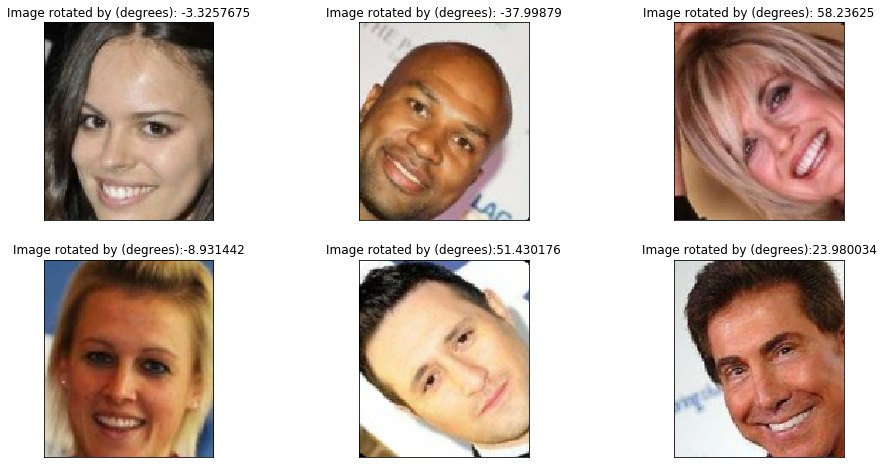

In [31]:
# Set up subplots
fig, ax = plt.subplots(2,3, figsize=(16,8), subplot_kw={'xticks': [], 'yticks': []})
counter = 0

# Iterate over ds
for i in train_rot_ds.take(6):
    counter += 1
    if counter < 4:
        ax[0,counter-1].imshow(i[0]) # Plot image
        ax[0,counter-1].set_title("Image rotated by (degrees): " + str(i[1].numpy())) # Print rotation angle
    else:
        ax[1,counter-4].imshow(i[0])
        ax[1,counter-4].set_title("Image rotated by (degrees):" + str(i[1].numpy()))

**4.3** Conceptual Question. [2pts] Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. For our network, is it a good idea to use dropout layers? Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.


To begin with, dropout, in this context, is a regularization technique to improve the performance of neural networks (by combatting overfitting) where we randomly select a set of neurons in our neural network architecture that are essentially ignored (or 'dropped out') during training such that their contribution to the activation of downstream neurons are temporarily removed on the foward pass and any weight updates from backprop are not applied to the neuron on the backward pass. By randomly ignoring certain nodes, we effectively make the layer appear like and be treated like a layer with a different number of nodes and connectivity to the prior layer - this makes it as though each update to a layer during training with dropout is performed with a different 'view' of the configured layer. After training the neurons, the weights and biases are scaled by the chosen dropout rate; this effectively updates the neurons at the end of the dropout mini-batch.

This is similar to training several neural network architectures in parallel and generalizing these architectures in order to obtain a regularized network that is less sensitive to the specific weights of neurons such that the network is less likely to overfit to the training data.

In the context of our current task, we are trying to figure out the angle that the images are rotated and we deal with image data that exhibit spatial relationships captured by our feature maps with activations that can, consequently, be highly correlated. 

Another reason that's been proposed for why we shouldn't use dropout in the context of our CNN is that we don't have that many parameters in our final models (relative to larger and more complex architectures on tasks with few labeled samples). The need for, and hence effectiveness, of dropout as a regularizer is less in this context. Instead, the batch normalization carried out by our existing CNN archicture should be considered sufficient.

As such, including dropout layers in between our convolutional layers doesn't seem to make much sense given our task because we have that the gradients are being averaged over the spatial extent of the feature maps - i.e. the weight gradients of our convolution layers are being averaged across spatial dimensions which tend to contain many highly correlated activations. We end up with many correlated terms in the averaged gradient such that each has different dropout patterns - dropout becomes relatively ineffective here as we effectively cancel out the effect of dropout if and when the mask is different at every spatial loction. This effectiveness causes dropout to slow down our model's training more than any marginal improvements in generalizability it might bring.

Experimentally, several have shown that models tend to perform worse when dropout layers are placed between convolutions (and that batch normalization serves as a better performing alternative). But that there's still a place for dropout in fully-connected layers. It seems like Gal and Ghahramani (2015) obtain a CNN formulation where dropout improves the CNN performance in Bernoulli approximate variational inference, but this is not the case here.

**4.4** Compile a Model. [4pts] Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.


In [32]:
# Obtain input dimensions
for i in train_rot_ds.take(1):
    ishape = (i[0].shape)

# Set up model
rot_model = Sequential()
rot_model.add(Conv2D(16, (2,2), activation='tanh', input_shape=ishape))
rot_model.add(MaxPooling2D((2,2)))
rot_model.add(Conv2D(64, (2,2), activation='tanh'))
rot_model.add(MaxPooling2D((2,2)))
rot_model.add(Conv2D(128, (2,2), activation='tanh'))
rot_model.add(MaxPooling2D((2,2)))
rot_model.add(Conv2D(254, (2,2), activation='tanh'))
rot_model.add(MaxPooling2D((2,2)))
rot_model.add(Conv2D(512, (2,2), activation='tanh'))
rot_model.add(MaxPooling2D((2,2)))
rot_model.add(Flatten()) # Add flatten layer
rot_model.add(Dropout(0.50))
rot_model.add(Dense(32, activation='linear')) # Add Dense layer
rot_model.add(Dense(1, activation='linear'))

# Display summary
rot_model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 139, 119, 16)      208       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 69, 59, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 68, 58, 64)        4160      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 34, 29, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 33, 28, 128)       32896     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 14, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 13, 254)      

In [37]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow import keras

loss = keras.losses.mean_squared_error
optimizer = Adam(lr=0.001)
metrics = ['accuracy'] 

# Compile model
rot_model.compile(optimizer=optimizer,
                   loss=loss,
                   metrics=metrics)

**4.5** Training the Model. [5pts] Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

In [34]:
%%time
verbose, epochs, batch_size = 1, 8, 128
# callbacks = [keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=2,
#             verbose=1)]

# Fit the model 
history = rot_model.fit(train_rot_ds.batch(batch_size),
                         epochs=epochs,
#                          callbacks=callbacks,
                         verbose=verbose,
                         validation_data=test_rot_ds.batch(batch_size))

**4.6** Conceptual Question.[2pt] Suppose you save just the weights after training for a while. If you were to load the weights again and continue training, would it work? How will it be different than continuing from a full-model save? Answer in a few sentences.


If we save just the weights after training for a while and load the weights again and continue training, **this would work** and is equivalent to using Callbacks to create checkpoints in our model training that we can come back to.

The key difference is that the saved semi-trained model here is still not fully trained; we cannot use this semi-trained model as we would a full-model save because it is not yet fully trained. Technically, we can go ahead and make predictions/classifications with our partially complete model if we store the weights as is and used them - but we would expect our performance to be worse when using these incomplete models - hence, the key difference is performance.

**4.7** Save and load your weights. [1pt] Save your model weights to the path 'model/*somename*' where *somename* is whatever filename prefix you want. Then load weights from the same path.

Note: If you don't intend to use it, you may leave your line of code commented out. Nothing should change if you run it after saving it though, since it will load the same weights and everything else about the model will still be in memory. If you close your notebook or restart your kernel in the future, run all the cells required to compile the model, but skip the cells that performs the fit and the save. After running the load weights cell, your previously trained model will be restored.

The code below is commented out; during the PSET I ran fitted the model once, stored the entire model and the weights and reused it.

In [290]:
# # We can save the model and weights as follows:
# rot_model.save('model/rot_model_a.h5')
# rot_model.save_weights('model/rot_model_b.h5')

# # We can delete our existing model
# del rot_model

# rot_model = keras.models.load_model('model/rot_model_a.h5')

In [291]:
# # This is what I used for subsequent parts
# rot_model = keras.models.load_model('model/rot_model_a.h5')

**4.8** Checking out performance on the Test Set.[5pts] Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:
![straightened face](data/straightened.png)
This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.


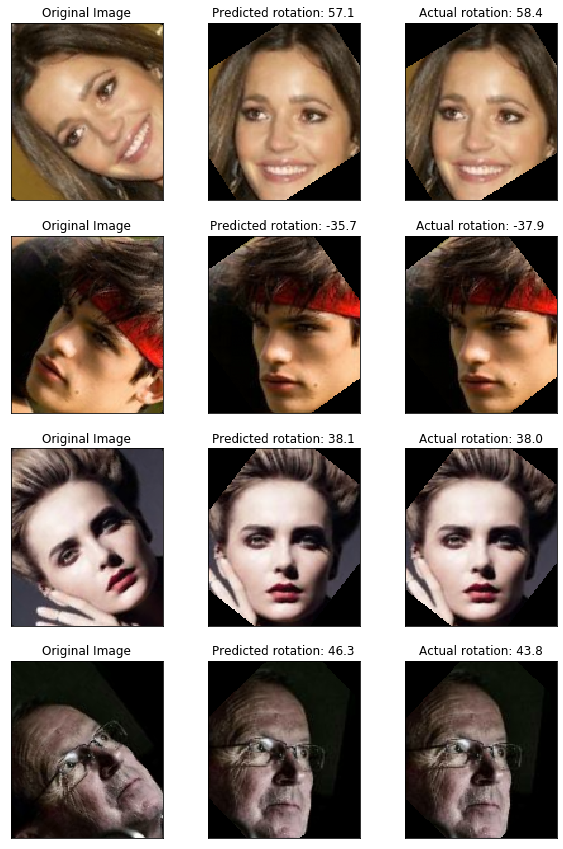

In [181]:
# We first store 4 rotated images from our test set to evaluate performance
test_images = []
test_angles = []

for datum in test_rot_ds.take(10):
    test_images.append(datum[0]) # Just want the image
    test_angles.append(datum[1].numpy()) # Just want the angle

fig, ax = plt.subplots(4, 3, figsize=(10, 15), subplot_kw={'xticks': [], 'yticks': []})
for i in range(4):
    
    # Plot original
    ax[i, 0].imshow(test_images[i])
    ax[i, 0].set_title('Original Image')
    
    # Plot predicted rotation
    pred_degree = (rot_model.predict(tf.reshape(test_images[i], [1, 140, 120, 3])))[0][0]
    pred_image  = rot_resize(test_images[i], - pred_degree)
    ax[i, 1].imshow(pred_image)
    ax[i, 1].set_title("Predicted rotation: " + str(round(pred_degree, 1)))
    
    # Plot actual rotation
    actl_image = rot_resize(test_images[i], - test_angles[i])
    ax[i, 2].imshow(actl_image)
    ax[i, 2].set_title("Actual rotation: " + str(round(test_angles[i], 1)))

**4.9** Visualizing Attention. [5pts] Like in question 3, we will use the saliency map and GradCAM to see what the network was looking at to determine the orientation of a testset image. The code will be very similar to what you used in question 3, but there are two important modifications. In defining the new `model_modifier(m)` function, simply replace the contents with `pass`. This is because your model does not (should not) have a softmax activation on the last layer, so we don't need this function to do anything. The other modification is to change the loss function (that was defined as a Python lambda function) to an MSE, so it should now be `tf.keras.backend.mean((output - label)**2)` where label is the actual rotation of the image. Pick any image from the test set, and like before, make a row of 3 subplots showing the original image, the saliency map, and the GradCAM output. __Question: What types of features does the network appear to use to determine orientation?__


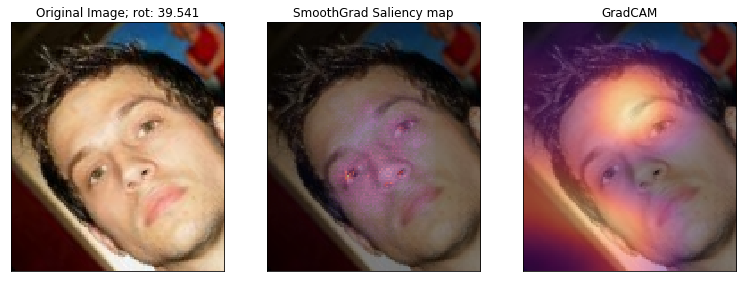

In [270]:
# Alternate model_modifier function
def model_modifier_rot(m):
    pass

# We want to select image 9
for i in test_rot_ds.take(9):
    pass
input_img_rot = i[0]
label = i[1].numpy()

# Generate saliency map
saliency = Saliency(rot_model)
loss_rot = lambda output: tf.keras.backend.mean((output - label)**2)

saliency_map = saliency(loss_rot, input_img_rot, smooth_samples=20)
saliency_map = normalize(saliency_map)

gradcam = Gradcam(rot_model, model_modifier_rot)
cam = gradcam(loss_rot, input_img_rot)
cam = normalize(cam)

# Plot saliency map, orignal and GradCAM
f, ax = plt.subplots(1, 3, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(input_img_rot)
ax[0].set_title('Original Image; rot: ' + str(label))
ax[1].imshow(input_img_rot)
ax[1].imshow(saliency_map[0], cmap='magma', alpha=.5)
ax[1].set_title('SmoothGrad Saliency map')
ax[2].imshow(input_img_rot)
ax[2].imshow(cam[0], cmap='magma', alpha=0.5)
ax[2].set_title('GradCAM')
plt.show()

From the SmoothGrad saliency map, it seems like our model uses key facial features to determine the orientation of images. Running the plots several times, it seems like the most salient features are the eyes and nose - more specifically, that T-shaped area of the face where the eyes and nose sit. Intuitively, this makes sense, since this also aligns with our heuristic response to faces (hence why facial dysmorphia and Picasso paintings are so striking).

Meanwhile, GradCAM seems to suggest that the pixels around jaws and the edges of the head are the most significant. That being said, the GradCAM heatmaps seem to vary significantly each time - so it might be the case that the heatmaps are quite noisy.

Overall, it seems like our network leverages most heavily on the most distinct and generally consistent facial features to determine orientation - the eyes and the nose.

**4.10** Correct an image of your choosing. [1pt] Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it. I found that my network was a very effective "un-confuser":
![Confused Chris](data/chrisprattcorrection.png)

We first examine our chosen image:
![RIP Juice](data/juice.jpg)

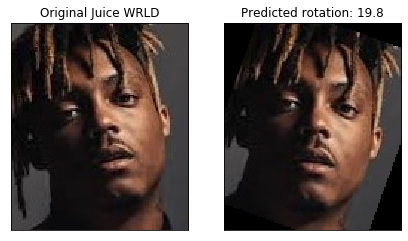

In [288]:
# Load image as array and normalize
img = Image.open('data/juice.jpg')
juice = normalize(np.asarray(img, dtype='uint8'))

# Make prediction
pred_rot = rot_model.predict(tf.reshape(juice, [1, 140, 120, 3]))[0][0]
pred_juice = rot_resize(juice, - pred_rot)

# RIP Juice WRLD
fig, ax = plt.subplots(1, 2, figsize=(7,7), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(juice)
ax[0].set_title("Original Juice WRLD")
ax[1].imshow(pred_juice)
ax[1].set_title("Predicted rotation: " + str(round(pred_rot, 1)))
plt.show()

I think it rotates Juice a bit too much here, but not bad overall!